In [1]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve
from keras.layers import Dropout

%matplotlib inline

Using TensorFlow backend.


In [3]:
df = pd.read_csv('data/kidney_disease.csv')

In [4]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [5]:
# df.info()

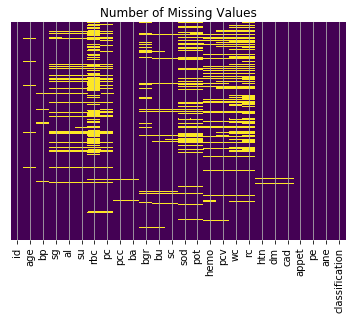

In [6]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.grid()
plt.title("Number of Missing Values")
plt.savefig('missing.png')

In [7]:
df.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                71
wc                106
rc                131
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [8]:
for i in ['age','bp','sg','al','su','bgr','bu','sc','sod','pot','hemo','rc','wc','pcv']:
    df[i].fillna(df[i].mean(),inplace=True)

In [9]:
df.isnull().sum()

id                  0
age                 0
bp                  0
sg                  0
al                  0
su                  0
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                 0
bu                  0
sc                  0
sod                 0
pot                 0
hemo                0
pcv                 0
wc                  0
rc                  0
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [10]:
# sns.countplot(data=df,x='rbc')
df['rbc'].fillna('normal',inplace=True)

In [11]:
# sns.countplot(data=df,x='pc')
df['pc'].fillna('normal',inplace=True)

In [12]:
df['pcc'].isnull().sum()

4

In [13]:
df['pcc'].fillna('notpresent',inplace=True)

In [14]:
df['ba'].fillna('notpresent',inplace=True)

In [15]:
df['htn'].fillna('no',inplace=True)

In [16]:
df['dm'] = df['dm'].replace(to_replace={'\tno':'no','\tyes':'yes',' yes':'yes'})
df['dm'].fillna('no',inplace=True)

In [17]:
df['cad'] = df['cad'].replace(to_replace='\tno',value='no')
df['cad'].fillna('no',inplace=True)

In [18]:
df['appet'].fillna('good',inplace=True)

In [19]:
df['pe'].fillna('no',inplace=True)

In [20]:
df['ane'].fillna('no',inplace=True)

In [21]:
df['cad'] = df['cad'].replace(to_replace='ckd\t',value='ckd')

In [22]:
df.isnull().sum()

id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

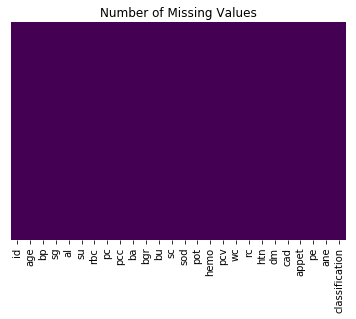

In [23]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title("Number of Missing Values")
plt.savefig('missing_updated.png')

In [24]:
from sklearn.preprocessing import LabelEncoder

for i in ['rbc','pc','pcc','ba','htn','dm','cad','appet','pe','ane','classification']:
    df[i] = LabelEncoder().fit_transform(df[i])

In [25]:
from sklearn.preprocessing import MinMaxScaler

for i in df.columns:
    df[i] = MinMaxScaler().fit_transform(df[i].astype(float).values.reshape(-1, 1))

In [26]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0.000000,0.522727,0.230769,0.75,0.2,0.0,1.0,1.0,0.0,0.0,...,0.777778,0.231405,0.525424,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.002506,0.056818,0.000000,0.75,0.8,0.0,1.0,1.0,0.0,0.0,...,0.644444,0.157025,0.441938,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.005013,0.681818,0.230769,0.25,0.4,0.6,1.0,1.0,0.0,0.0,...,0.488889,0.219008,0.441938,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,0.007519,0.522727,0.153846,0.00,0.8,0.0,1.0,0.0,1.0,0.0,...,0.511111,0.185950,0.305085,1.0,0.0,0.0,1.0,1.0,1.0,0.0
4,0.010025,0.556818,0.230769,0.25,0.4,0.0,1.0,1.0,0.0,0.0,...,0.577778,0.210744,0.423729,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import Dropout
from sklearn.model_selection import train_test_split

In [28]:
df.shape

(400, 26)

In [29]:
df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [30]:
df.drop(['id'],axis=1, inplace= True)

In [31]:
df.shape

(400, 25)

In [32]:
df.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [33]:
features = list(df.columns[0:24])

In [34]:
features

['age',
 'bp',
 'sg',
 'al',
 'su',
 'rbc',
 'pc',
 'pcc',
 'ba',
 'bgr',
 'bu',
 'sc',
 'sod',
 'pot',
 'hemo',
 'pcv',
 'wc',
 'rc',
 'htn',
 'dm',
 'cad',
 'appet',
 'pe',
 'ane']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(df[features], df['classification'].values, test_size=0.30, random_state=42)

In [36]:
model = Sequential()

model.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'elu', input_dim = 24))
model.add(Dropout(rate = 0.5))

model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'elu'))
model.add(Dropout(rate = 0.5))

model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'elu'))
model.add(Dropout(rate = 0.5))

model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                1600      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
dropout_3 (Dropout)  

In [37]:
import keras
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output
class PlotLosses(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        
        self.fig = plt.figure()
        
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.i += 1
        
        clear_output(wait=True)
        plt.plot(self.x, self.losses, label="loss")
        plt.legend()
        plt.show();
        
plot_losses = PlotLosses()

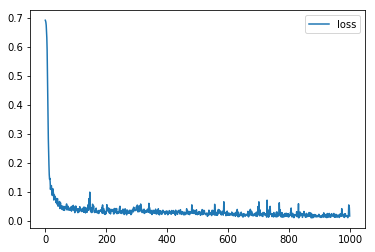

In [38]:
history = model.fit(X_train.values,y_train,epochs=1000, batch_size=32,verbose=2,validation_split=0.2, callbacks=[plot_losses])

In [39]:
y_prediction = model.predict_classes(X_test.values)

In [50]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_prediction)
tn, fn, fp, tp=confusion_matrix(y_prediction,y_test).ravel()

print(cm)

accuracy = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])
print("Accuracy: "+ str(accuracy*100)+"%")

total=sum(sum(cm))

accuracy = (cm[0,0]+cm[1,1]) / total
print ('Accuracy : ', accuracy*100)

sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
print('Sensitivity : ', sensitivity*100 )

Specificity = cm[1,1]/(cm[1,1]+cm[0,1])
print('Specificity : ', Specificity*100 )

from sklearn.metrics import accuracy_score,roc_curve, confusion_matrix, roc_auc_score, auc, f1_score

print('roc_auc_score = ' + str(roc_auc_score(y_prediction, y_test)))

print("Accuracy:",(tp+tn)/(tp+tn+fp+fn))
print("Precision:",(tp/(tp+fp)))
print("Recall//Senstivity:",(tp/(tp+fn)))
print("tp:", tp) 
print("fp:", fp) 
print("tn:",tn) 
print("fn:",fn)

recall = (tp/(tp+fn))
precision=(tp/(tp+fp))

f1 = 2 / ( (1/recall) + (1 / precision))
print('F1 score:', f1)

[[72  4]
 [ 0 44]]
Accuracy: 96.66666666666667%
Accuracy :  96.66666666666667
Sensitivity :  100.0
Specificity :  91.66666666666666
roc_auc_score = 0.9583333333333333
Accuracy: 0.9666666666666667
Precision: 0.9166666666666666
Recall//Senstivity: 1.0
tp: 44
fp: 4
tn: 72
fn: 0
F1 score: 0.9565217391304348


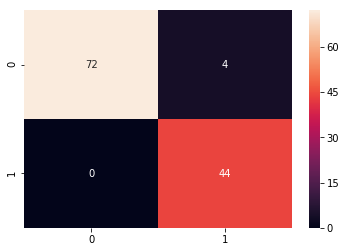

In [45]:
sns.heatmap(confusion_matrix(y_test,y_prediction),annot=True,fmt="d")

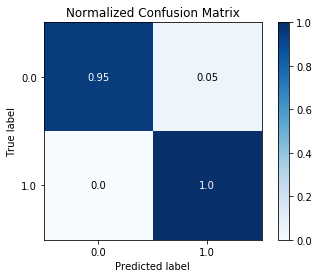

In [46]:
import scikitplot
scikitplot.metrics.plot_confusion_matrix(y_test, y_prediction, normalize=True)

In [47]:
print("Decision Tree Classifier report \n", classification_report(y_test, y_prediction))

Decision Tree Classifier report 
               precision    recall  f1-score   support

         0.0       1.00      0.95      0.97        76
         1.0       0.92      1.00      0.96        44

   micro avg       0.97      0.97      0.97       120
   macro avg       0.96      0.97      0.96       120
weighted avg       0.97      0.97      0.97       120



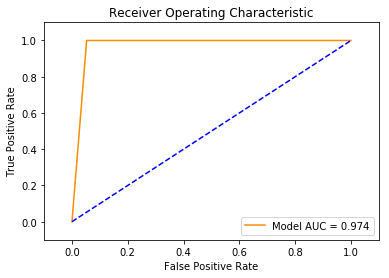

In [48]:
def roc_curve_acc(Y_test, Y_pred,method):
    false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, Y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, color='darkorange',label='%s AUC = %0.3f'%(method, roc_auc))
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'b--')
    plt.ylim([-0.1, 1.1])
    plt.xlim([-0.1, 1.1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')

roc_curve_acc(y_test, y_prediction, "Model")

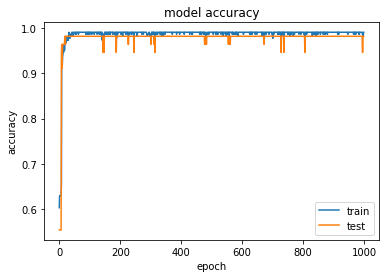

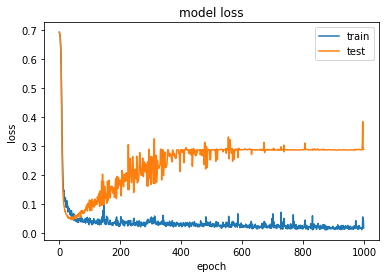

In [49]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()